In [1]:
%run utils.py

C:\Development\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [3]:
np.random.seed(5)

In [4]:
X, y = datasets.make_gaussian_quantiles(mean=[0,0], n_classes=2)

In [5]:
df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]))
df.columns = ['x0', 'x1', 'y']

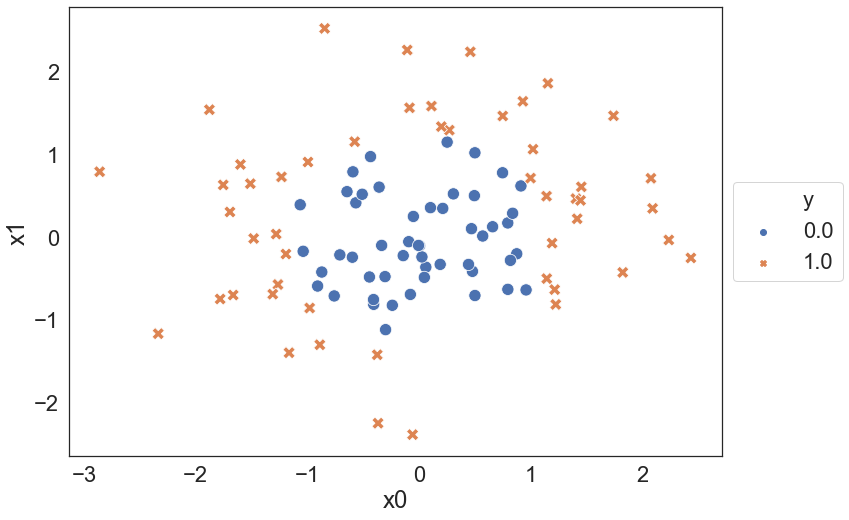

In [6]:
plot_data_and_decision_boundary(df, 'x0', 'x1', 'y')

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
linear_model = LogisticRegression()
linear_model.fit(X, y)

LogisticRegression()

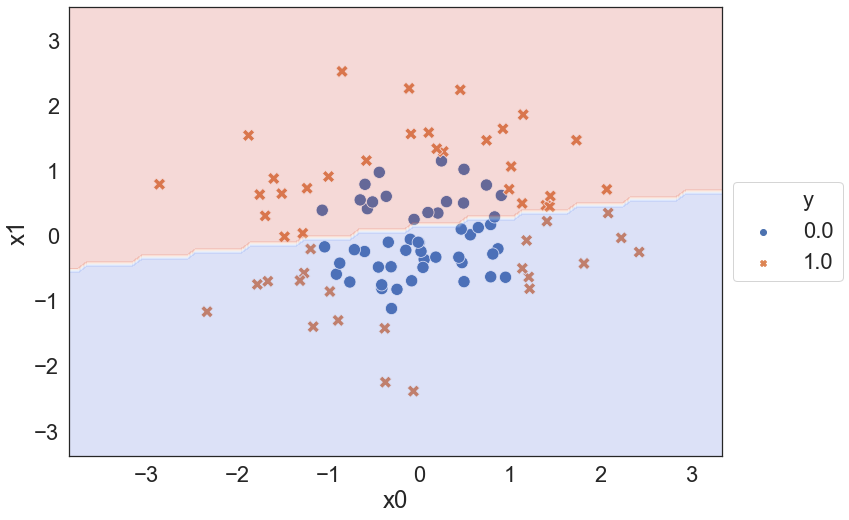

In [9]:
plot_data_and_decision_boundary(df, 'x0', 'x1', 'y', linear_model)

In [10]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn_1_layer = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn_1_layer.fit(X, y)

In [ ]:
plot_data_and_decision_boundary(df, 'x0', 'x1', 'y', nn_1_layer)

## Example from exercise 1

In [ ]:
n = 100
Age = 60 + np.random.normal(scale=10, size=n)
SBP = np.random.randint(-30, 30, n) + 120

In [ ]:
# Very simple label-generating process
y_chd = (Age > 55) & (SBP > 130)

In [ ]:
df = pd.DataFrame(np.vstack([Age, SBP, y_chd]).T)
df.columns = ['Age', 'SBP', 'Coronary Heart Disease']

In [ ]:
plot_data_and_decision_boundary(df, 'Age', 'SBP', 'Coronary Heart Disease')

Logistic Regression model cannot perfectly fit the data

In [ ]:
linear_model.fit(df[['Age', 'SBP']], y_chd)

In [ ]:
plot_data_and_decision_boundary(df, 'Age', 'SBP', 'Coronary Heart Disease', linear_model)

Training Neural Network on the same data

In [ ]:
nn_1_layer = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, solver='lbfgs', alpha=0.001, activation='tanh')
nn_1_layer.fit(df[['Age', 'SBP']], y_chd)

In [ ]:
plot_data_and_decision_boundary(df, 'Age', 'SBP', 'Coronary Heart Disease', nn_1_layer)

However, a very simple non-linear classifier like a decision tree would perfectly recover the data-generating process

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(df[['Age', 'SBP']], y_chd)

In [ ]:
plot_data_and_decision_boundary(df, 'Age', 'SBP', 'Coronary Heart Disease', tree)

In [ ]:
plot_tree(tree, feature_names=['Age', 'SBP'], class_names=['False', 'True'])